<a href="https://colab.research.google.com/github/julianovale/PO450/blob/main/Semana07_PO450_Atividade05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juliano Cesar Rodrigues Vale - Atividade 5

# RA: 265750

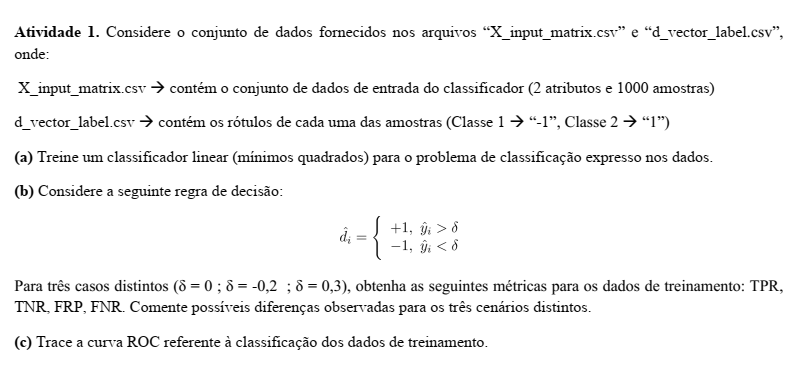

In [1]:
# importando bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [2]:
# leitura dos dados

X_url = 'https://raw.githubusercontent.com/julianovale/PO450/main/semana07/X_input_matrix.csv'
d_url = 'https://raw.githubusercontent.com/julianovale/PO450/main/semana07/d_vector_label.csv'
x = np.loadtxt(X_url, delimiter=',')
d = np.loadtxt(d_url, delimiter=',')
dfx = pd.DataFrame(x, columns=['Var01','Var02'])
dfd = pd.DataFrame(d, columns=['d'])
df = pd.concat([dfx, dfd], axis=1)
df.head()

,Var01,Var02,d
0,9.048768,8.506883,1.0
1,4.403171,4.467171,1.0
2,0.885328,9.306700,-1.0
3,4.598181,7.436493,1.0
4,1.367086,8.623110,1.0


## Item (a)

In [3]:
# splitando treinamento e teste
prop_test = 0.3
X_train, X_test, d_train, d_test = train_test_split(df[['Var01','Var02']], df['d'], test_size = prop_test)

In [4]:
# criando instância e ajustando o modelo
model_reg_linear = LinearRegression()
model_reg_linear.fit(X_train, d_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Item (b) ($\delta$ = 0)

In [5]:
# predizendo e calculando acurácia

delta = 0

y_hat_train = model_reg_linear.predict(X_train)
d_hat_train = np.where((y_hat_train >= delta), 1, -1)
print('********** Relatório do treinamento **********')
print(classification_report(d_train, d_hat_train))
print()

y_hat_test = model_reg_linear.predict(X_test)
d_hat_test = np.where((y_hat_test >= delta), 1, -1)
print('********** Relatório do treinamento **********')
print(classification_report(d_test, d_hat_test))

********** Relatório do treinamento **********
              precision    recall  f1-score   support

        -1.0       0.89      0.88      0.88       353
         1.0       0.88      0.88      0.88       347

    accuracy                           0.88       700
   macro avg       0.88      0.88      0.88       700
weighted avg       0.88      0.88      0.88       700


********** Relatório do treinamento **********
              precision    recall  f1-score   support

        -1.0       0.85      0.89      0.87       147
         1.0       0.89      0.85      0.87       153

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



## Item (b) ($\delta$ = -0.2)

In [6]:
# predizendo e calculando acurácia

delta = -0.2

y_hat_train = model_reg_linear.predict(X_train)
d_hat_train = np.where((y_hat_train >= delta), 1, -1)
print('********** Relatório do treinamento **********')
print(classification_report(d_train, d_hat_train))
print()

y_hat_test = model_reg_linear.predict(X_test)
d_hat_test = np.where((y_hat_test >= delta), 1, -1)
print('********** Relatório do treinamento **********')
print(classification_report(d_test, d_hat_test))

********** Relatório do treinamento **********
              precision    recall  f1-score   support

        -1.0       0.95      0.78      0.86       353
         1.0       0.81      0.95      0.88       347

    accuracy                           0.87       700
   macro avg       0.88      0.87      0.87       700
weighted avg       0.88      0.87      0.87       700


********** Relatório do treinamento **********
              precision    recall  f1-score   support

        -1.0       0.93      0.81      0.87       147
         1.0       0.84      0.94      0.89       153

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



## Item (b) ($\delta$ = 0.3)

In [7]:
# predizendo e calculando acurácia

delta = 0.3

y_hat_train = model_reg_linear.predict(X_train)
d_hat_train = np.where((y_hat_train >= delta), 1, -1)
print('********** Relatório do treinamento **********')
print(classification_report(d_train, d_hat_train))
print()

y_hat_test = model_reg_linear.predict(X_test)
d_hat_test = np.where((y_hat_test >= delta), 1, -1)
print('********** Relatório do treinamento **********')
print(classification_report(d_test, d_hat_test))

********** Relatório do treinamento **********
              precision    recall  f1-score   support

        -1.0       0.76      0.96      0.85       353
         1.0       0.95      0.69      0.80       347

    accuracy                           0.83       700
   macro avg       0.85      0.83      0.83       700
weighted avg       0.85      0.83      0.83       700


********** Relatório do treinamento **********
              precision    recall  f1-score   support

        -1.0       0.75      0.96      0.84       147
         1.0       0.95      0.69      0.80       153

    accuracy                           0.82       300
   macro avg       0.85      0.82      0.82       300
weighted avg       0.85      0.82      0.82       300

